# Verify Preprocessed Data

This notebook verifies the content of the preprocessed data folder: `/media/samuele/data/LIDC-IDRI/preprocessed/`
It visualizes:
1. MHA Volumes
2. Reconstructions
3. 2D Projections
4. 400 Projections (3D/Other)

In [15]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import itk

# Setup plotting
plt.rcParams['figure.figsize'] = [10, 10]

In [16]:
base_path = "/media/samuele/data/LIDC-IDRI/preprocessed/"
print(f"Checking data in: {base_path}")

subdirs = ["mha", "recon", "projections_2d", "projections_400"]
for sd in subdirs:
    path = os.path.join(base_path, sd)
    if os.path.exists(path):
        files = os.listdir(path)
        print(f"  - {sd}: {len(files)} files found.")
    else:
        print(f"  - {sd}: NOT FOUND")

Checking data in: /media/samuele/data/LIDC-IDRI/preprocessed/
  - mha: 1018 files found.
  - recon: 1018 files found.
  - projections_2d: 319800 files found.
  - projections_400: 1020 files found.


In [17]:
def show_slice(image_array, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.show()

def show_volume_slices(volume_array, title="Volume"):
    shape = volume_array.shape
    center = [s // 2 for s in shape]
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"{title} (Shape: {shape})", fontsize=16)
    
    # Axial (XY plane, slice along Z)
    axes[0].imshow(volume_array[center[0], :, :], cmap='gray')
    axes[0].set_title(f"Axial (Z={center[0]})")
    axes[0].axis('off')

    # Coronal (XZ plane, slice along Y)
    axes[1].imshow(volume_array[:, center[1], :], cmap='gray', aspect='auto')
    axes[1].set_title(f"Coronal (Y={center[1]})")
    axes[1].axis('off')

    # Sagittal (YZ plane, slice along X)
    axes[2].imshow(volume_array[:, :, center[2]], cmap='gray', aspect='auto')
    axes[2].set_title(f"Sagittal (X={center[2]})")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

## 1. MHA Volumes
Visualizing original volumes from `/mha`.

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/mha/volume_0.mha
  Spacing: itkVectorD3 ([2, 2, 2])
  Origin: itkPointD3 ([-153.3, -160, -214.75])
  Numpy Shape: (117, 160, 160), Min: -3024, Max: 3071


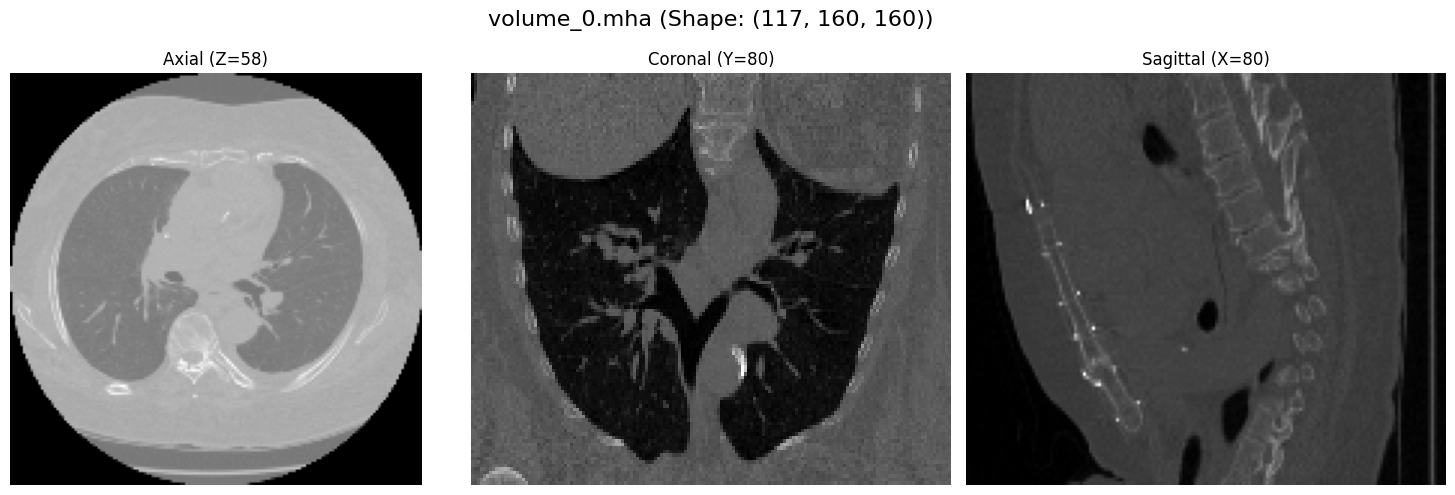

In [18]:
mha_path = os.path.join(base_path, "mha")
mha_files = sorted(glob.glob(os.path.join(mha_path, "*.mha")))

if mha_files:
    sample_mha = mha_files[0]
    print(f"Loading: {sample_mha}")
    
    # Read image
    itk_image = itk.imread(sample_mha)
    
    # Metadata
    spacing = itk_image.GetSpacing()
    origin = itk_image.GetOrigin()
    # direction = itk_image.GetDirection()
    print(f"  Spacing: {spacing}")
    print(f"  Origin: {origin}")
    
    # Convert to array
    volume_array = itk.GetArrayFromImage(itk_image)
    print(f"  Numpy Shape: {volume_array.shape}, Min: {volume_array.min()}, Max: {volume_array.max()}")
    
    show_volume_slices(volume_array, title=os.path.basename(sample_mha))
else:
    print("No .mha files found.")

## 2. Reconstructions
Visualizing numpy reconstructions from `/recon`.

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/recon/volume_0.npy
  Shape: (117, 160, 160), Min: -8.480064570903778e-05, Max: 0.060999996960163116


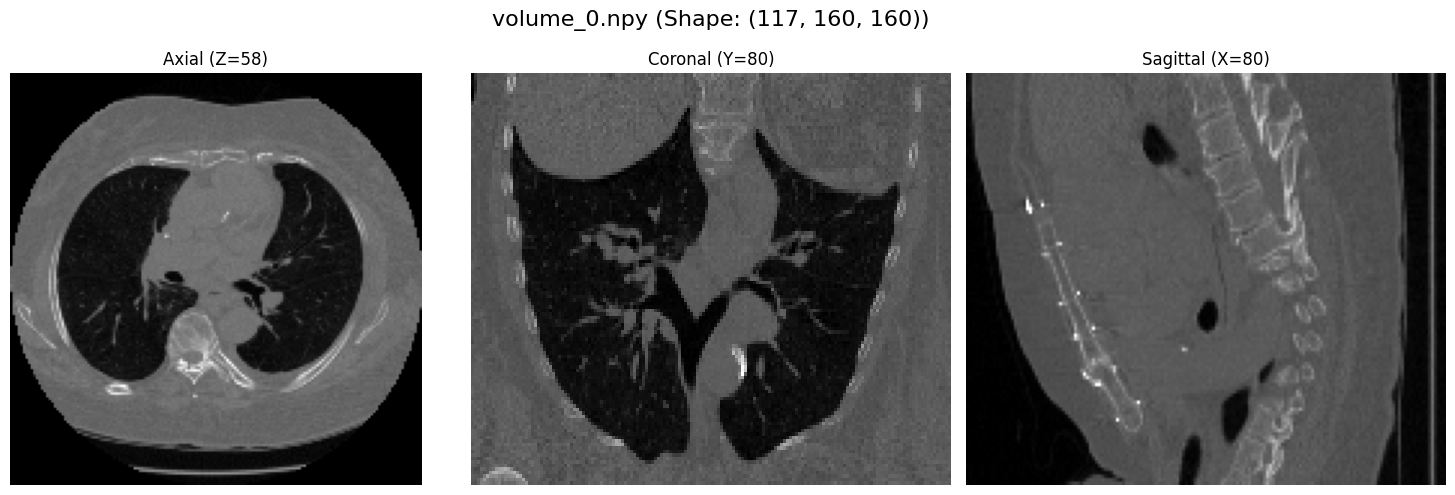

In [19]:
recon_path = os.path.join(base_path, "recon")
recon_files = sorted(glob.glob(os.path.join(recon_path, "*.npy")))

if recon_files:
    sample_recon = recon_files[0]
    print(f"Loading: {sample_recon}")
    
    recon_array = np.load(sample_recon)
    print(f"  Shape: {recon_array.shape}, Min: {recon_array.min()}, Max: {recon_array.max()}")
    
    # Recons might be 3D or 4D depending on structure
    if recon_array.ndim == 3:
        show_volume_slices(recon_array, title=os.path.basename(sample_recon))
    else:
        print(f"  Skipping 3D slice view as dimensions are {recon_array.ndim} (not 3)")
else:
    print("No recon .npy files found.")

## 3. 2D Projections
Visualizing projections from `/projections_2d`.

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/projections_2d/noisy_projections_2d_gaussian_patient_0_slice_0.npy
  Shape: (512, 354), Min: -0.2203986942768097, Max: 3.6164071559906006


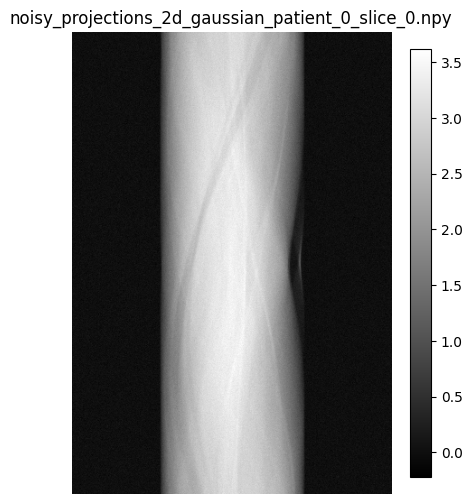

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/projections_2d/noisy_projections_2d_gaussian_patient_0_slice_1.npy
  Shape: (512, 354), Min: -0.20738407969474792, Max: 3.6292977333068848


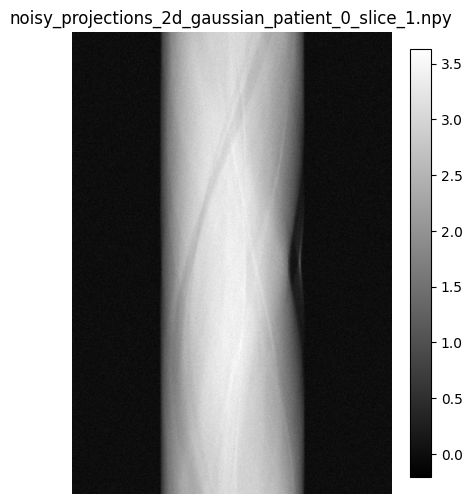

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/projections_2d/noisy_projections_2d_gaussian_patient_0_slice_10.npy
  Shape: (512, 354), Min: -0.20784513652324677, Max: 3.666572093963623


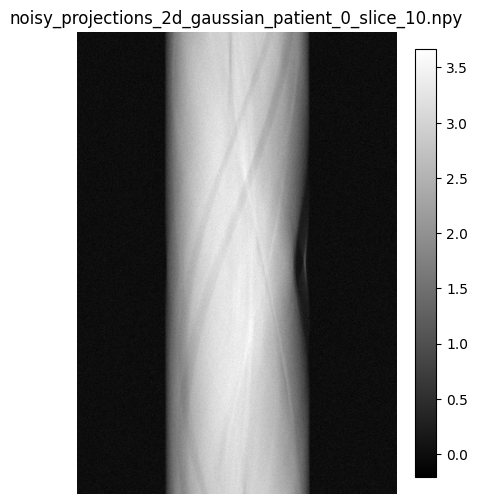

In [20]:
proj2d_path = os.path.join(base_path, "projections_2d")
proj2d_files = sorted(glob.glob(os.path.join(proj2d_path, "*.npy")))

if proj2d_files:
    # Pick a few samples if available
    samples = proj2d_files[:3]
    for sample in samples:
        print(f"Loading: {sample}")
        proj_arr = np.load(sample)
        print(f"  Shape: {proj_arr.shape}, Min: {proj_arr.min()}, Max: {proj_arr.max()}")
        
        if proj_arr.ndim == 2:
             show_slice(proj_arr, title=os.path.basename(sample))
        else:
             # If it's a stack, show the middle one
             print("  Stack of projections? Showing middle slice.")
             show_slice(proj_arr[proj_arr.shape[0]//2], title=os.path.basename(sample) + " (mid)")
else:
    print("No 2D projection files found.")

## 4. 400 Projections (3D/Other)
Visualizing data from `/projections_400`. These are stacks of 2D projections.

Loading: /media/samuele/data/LIDC-IDRI/preprocessed/projections_400/projections_0.npy
  Shape: (400, 256, 256), Min: -0.0207370612770319, Max: 7.539326190948486
  Stack of projections. Displaying sample projections along Z axis (Projection Index)...


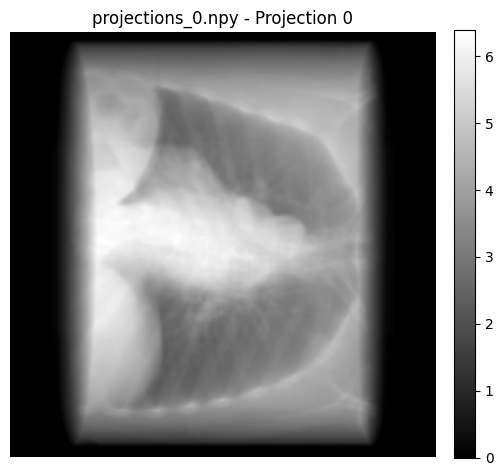

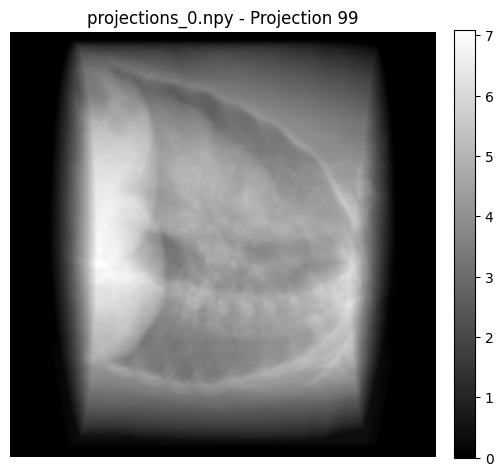

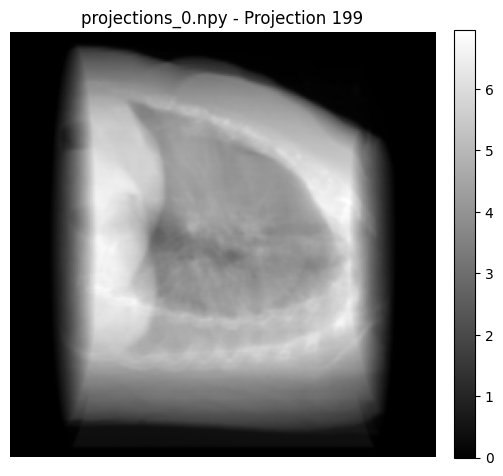

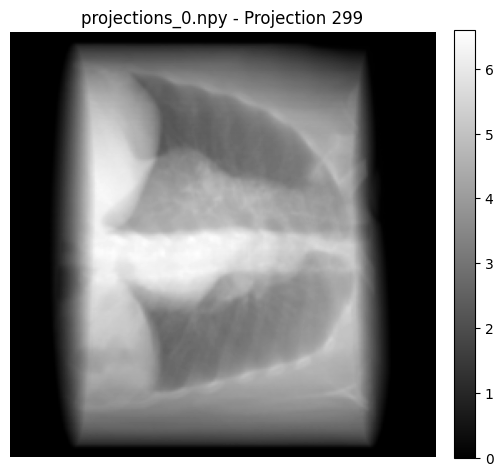

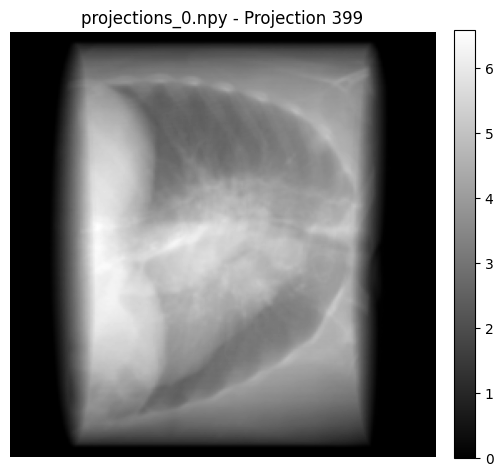

In [21]:
proj400_path = os.path.join(base_path, "projections_400")
proj400_files = sorted(glob.glob(os.path.join(proj400_path, "*.npy")))

if proj400_files:
    sample_400 = proj400_files[0]
    print(f"Loading: {sample_400}")
    
    arr_400 = np.load(sample_400)
    print(f"  Shape: {arr_400.shape}, Min: {arr_400.min()}, Max: {arr_400.max()}")
    
    if arr_400.ndim == 3:
        # Stack of projections (N, H, W)
        print("  Stack of projections. Displaying sample projections along Z axis (Projection Index)...")
        
        n_projs = arr_400.shape[0]
        # Select a few indices to show (e.g., start, quarter, half, end)
        indices_to_show = np.unique(np.linspace(0, n_projs - 1, num=5, dtype=int))
        
        for idx in indices_to_show:
            show_slice(arr_400[idx], title=f"{os.path.basename(sample_400)} - Projection {idx}")
            
    elif arr_400.ndim == 2:
        show_slice(arr_400, title=os.path.basename(sample_400))
    else:
        print(f"  Complex shape {arr_400.shape}. showing first index if possible.")
        if arr_400.shape[0] > 0:
             show_slice(arr_400[0], title=os.path.basename(sample_400) + " [0]")
else:
    print("No files found in projections_400.")